In [2]:
# python packages

import numpy as np
import pandas as pd 

#ploting libraries 
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly

/home/mitch/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mitch/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Bellow is  a defined function that designed to test residuals for a normal distribution

In [11]:
#define a test for normality 

#test for normality 
#y_test is the target variable and y_pred are the predicted variables 
def test_for_normality(y_test,y_pred):
    from scipy.stats import boxcox
    from scipy.stats import jarque_bera
    from scipy.stats import normaltest
    colo = np.random.randint(3, size=1)
    colors=[['r','gold','c','m'],
            ['g','orange','b','hotpink'],
            ['skyblue','coral','lightgreen','mediumslateblue'],
           ['g','limegreen','orange','yellow']]
    
    try:
        data_series = y_pred-y_test
    except:
        data_series=y_test
    # input the mean, standard deviation and lenght of the residuals
    normal = np.random.normal(np.mean(data_series), np.std(data_series), len(data_series))

    plt.figure(figsize=(16, 12))

    plt.subplot(2, 2, 1)
    plt.hist(data_series,color = colors[colo[0]][1],alpha = 0.8)#bins=40,
    plt.hist(normal,color = colors[colo[0]][2], alpha = 0.2)

    #Generate a Box Plot of solar system counts
    plt.subplot(2, 2, 2)
    plt.boxplot(data_series)

    #Generate a QQ plot of the gamma distribution and the solar system counts 
    plt.subplot(2, 1, 2)
    orderd_normal = sorted(normal)
    ordered_data=sorted(data_series)
    plt.scatter(ordered_data,orderd_normal, color = colors[colo[0]][3])
    plt.plot(orderd_normal,orderd_normal,color= colors[colo[0]][0])
    plt.title('QQPlot of residuals and normal Distribution')
    plt.xlabel('residuals')
    plt.ylabel('normaly distribution')
    plt.show()

    jb_stats = jarque_bera(data_series)
    norm_stats = normaltest(data_series)
    print('the Jarque berra stat is {}, and the pvalue is {}'.format(jb_stats[0],jb_stats[1]))
    print(norm_stats)
    

    #elecResiduals = np.sort(result2_elect.resid[np.logical_not(np.isnan(result2_elect.resid))])
    sorted_data_series = np.sort(data_series[np.logical_not(np.isnan(data_series))])

    
    data_series_min = sorted_data_series.min()
    data_series_max = sorted_data_series.max()
    data_series_len = len(sorted_data_series)
    data_series_std = np.std(sorted_data_series)
    data_series_avg = np.mean(sorted_data_series)

    print('the Minimum is {}'.format(data_series_min))
    print('the Maximum is {}'.format(data_series_max))
    print('the Length is {}'.format(data_series_len))
    print('the Length is {}'.format(data_series_len))
    print('the Standard Deviation is {}'.format(data_series_std))
    print('the Mean is {}'.format(data_series_avg))
    print('\n')

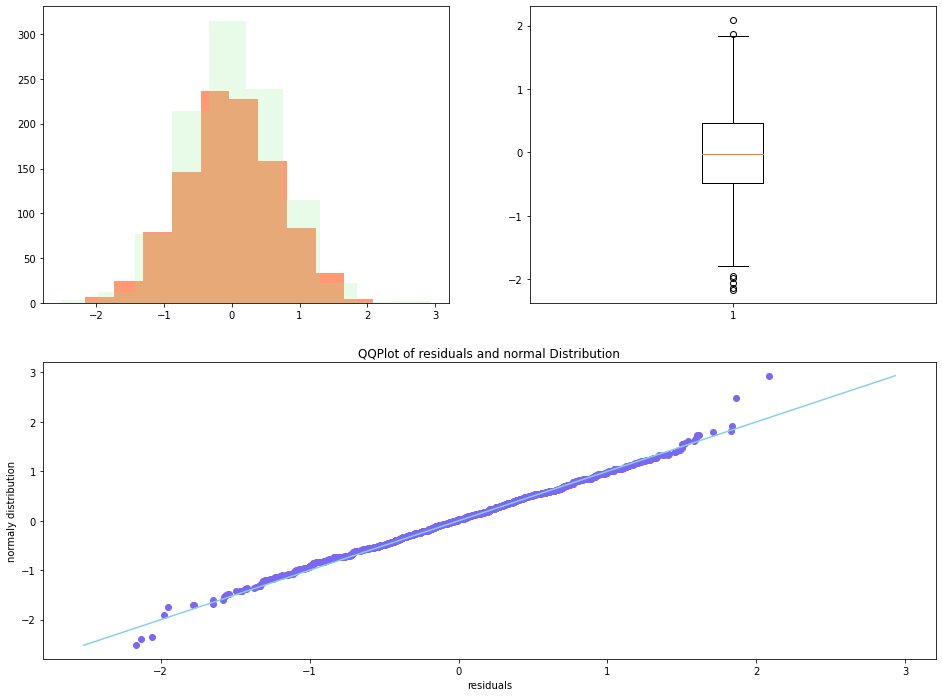

the Jarque berra stat is 1.1335666353611142, and the pvalue is 0.5673474832776223
NormaltestResult(statistic=1.1153963594352352, pvalue=0.5725253988595728)
the Minimum is -2.1623876406730087
the Maximum is 2.0875799520910068
the Length is 1000
the Length is 1000
the Standard Deviation is 0.7016836965192418
the Mean is -0.012140017387017907




In [25]:
# create a fake distribution assuming normaly distributed predictions
mean = [5,10]
standard_dev_pred = [0.5,1]
standard_dev_test = [0.5,1]

size = 1000




y_test = np.random.normal(mean[0], standard_dev_test[0], size)

y_pred = np.random.normal(mean[0], standard_dev_pred[0], size)


test_for_normality(y_test,y_pred)